In [3]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
from sklearn.datasets import load_digits # 사이킷런이 제공하는 MNIST 손글씨 데이터를 불러오기 위해 import 한다.
from sklearn.neighbors import KNeighborsClassifier # kNN
from sklearn.svm import SVC # SVM
from sklearn import tree # 의사결정 트리
from sklearn.ensemble import VotingClassifier # 하드/소프트 보팅을 계산하기 위해 import 한다.

In [30]:
mnist = load_digits() # 사이킷런이 제공하는 손글씨 데이터를 불러온다.
features, labels = mnist.data, mnist.target

학습 데이터와 테스트 데이터를 나눈다.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
print('[학습 데이터 개수: {} , 테스트 데이터 개수 : {}'.format(X_train.shape[0], X_test.shape[0]))

[학습 데이터 개수: 1437 , 테스트 데이터 개수 : 360


단일 모델의 정확도 측정  
- 앙상블 정확도를 측정하기에 앞서서 단일 모델들의 정확도를 kNN, SVC, 의사 결정 트리 분류기를 만들어 정확도를 계산한다.

In [32]:
# 먼저 
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predict = knn.predict(X_test)
print('정확도: {:6.2%}'.format(accuracy_score(y_test, knn_predict)))

정확도: 84.72%


In [33]:
# SVM
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predict = svm.predict(X_test)
print('svm accuracy: {:%}'.format(accuracy_score(y_test, svm_predict)))

svm accuracy: 90.000000%


In [34]:
# 의사결정 트리
dtree = tree.DecisionTreeClassifier(max_depth=8, random_state=35).fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
print('dtree accuracy: {:%}'.format(accuracy_score(y_test, dtree_predict)))

dtree accuracy: 82.777778%


하드 보팅  
- 일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투표를 받은 예측값으로 최종 결론을 내린다.

In [35]:
hv_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='hard').fit(X_train, y_train)
hard_voting_predict = voting_clf.predict(X_test)
print('hard_voting: {:%}'.format(accuracy_score(y_test, hard_voting_predict)))

hard_voting: 96.388889%


In [36]:
sf_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='soft').fit(X_train, y_train)
soft_voting_predict = voting_clf.predict(X_test)
print('soft_voting: {:%}'.format(accuracy_score(y_test, soft_voting_predict)))

soft_voting: 96.388889%


확률 합계

In [42]:
# predict_proba() 메소드로 분류 모델이 각 클래스(타겟, 레이블, 실제값)의 확률을 계산한다.
knn_proba = knn.predict_proba(X_test)
# print(len(knn_proba))
# print(knn_proba)
print('확률 합계: {}'.format(knn_proba[0].sum()))

확률 합계: 1.0


In [44]:
svm_proba = svm.predict_proba(X_test)
print('확률 합계: {}'.format(svm_proba[0].sum()))

확률 합계: 1.0000000000000002


In [46]:
dtree_proba = dtree.predict_proba(X_test)
print('확률 합계: {}'.format(dtree_proba[0].sum()))

확률 합계: 1.0


In [47]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='hard').fit(X_train, y_train)
hard_voting_predict = voting_clf.predict(X_test)
print('hard_voting: {:%}'.format(accuracy_score(y_test, hard_voting_predict)))

hard_voting: 90.555556%


In [48]:
voting_clf = VotingClassifier(estimators=[('knn', knn), ('svm', svm), ('decision_tree', dtree)], weights=[1, 1, 1],
                voting='soft').fit(X_train, y_train)
soft_voting_predict = voting_clf.predict(X_test)
print('soft_voting: {:%}'.format(accuracy_score(y_test, soft_voting_predict)))

soft_voting: 88.888889%


단일 모델과 앙상블 모델의 정확도 비교 시각화

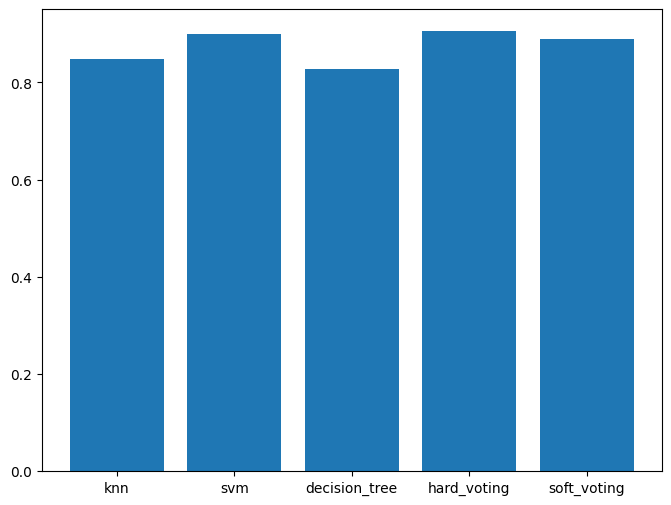

In [49]:
plt.figure(figsize=(8, 6))
x = np.arange(5)
plt.bar(x, height=[
    accuracy_score(y_test, knn_predict),
    accuracy_score(y_test, svm_predict),
    accuracy_score(y_test, dtree_predict),
    accuracy_score(y_test, hard_voting_predict),
    accuracy_score(y_test, soft_voting_predict)
])
plt.xticks(x, ['knn', 'svm', 'decision_tree', 'hard_voting', 'soft_voting'])
plt.show()